## What is TensorFlow, anyway?
simply, it is the mots powerful, popular Deep Learning library.
It has been developed by the Google Brain Team and used (locally) by for the purposes of conducting machine learning and deep neural networks research. It turned out later it is general enough to be applicable in a wide variety of other domains as well. Therefore, Google open sourced TensorFlow in Nov 2015 and made it available freely for public.

## TensorFlow Backbone: Computational Graph
in TensorFlow, models are represented by a **flow** (graph: DAG) of **tensors** (hence the name), **called Computational Graph**.
Each **node** of the graph is a **mathematical operation** (ex: addition, multiplication) taking a tensor as input and outputing a tensor. Thus, the edges represent tensors communicated between nodes.
<img src="images/Computational_Graph.gif" alt="Computational_Graph" title="Computational_Graph" height="322" width="322"/>
You can think of **Tensors** as a generalization of vectors and matrices to potentially higher dimensions.
<img src="images/tensor.png" alt="Tensors" title="Tensors" height="420" width="420"/>

## Why Computational Graphs?
Computational Graphs help representing **computations without actually performing it until asked**. In this sense, it is a form of lazy computing, and it allows for some great improvements to the running of code:
- Faster computation of complex variables.
- Distributed computation across multiple systems, including GPUs.
- Reduced redundency in some computations.
- Manage dependencied between nodes.
- Allow us to build complex models in terms of small and simple operations (ex: gradient).

## A typical “flow” of TensorFlow
1. Build a computational graph
2. Initialize variables
3. Create session
4. Run graph in session
5. Close session

## Before we start
The most basic 3 operations are:
- constant
- variable: trainable variables (ex: weights & bais)
- placeholder: untrainable variables (ex: input & output data)

Examples:

In [3]:
# import tensorflow library
import tensorflow as tf

# create a constant tensor
a = tf.constant(5)
# create a placeholder tensor
b = tf.placeholder(tf.int32)
# compute a * b
c = a * b
print(a)
print(b)
print(c)

Tensor("Const_1:0", shape=(), dtype=int32)
Tensor("Placeholder:0", dtype=int32)
Tensor("mul:0", dtype=int32)


Notice that printing the tensors does not output their values as you might expect. The above statements only build the computation graph. Executing the graph and computing real values should be done with a session:

In [4]:
with tf.Session() as sess:
    result = sess.run(c, feed_dict={b:7})
    print(result)

35


## Example: Linear Regression

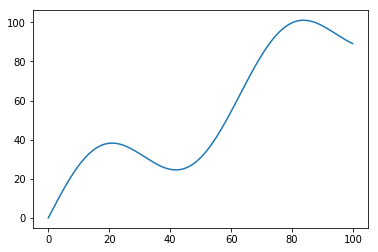

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# define input data
X_data = np.arange(100, step=0.1)
y_data = X_data + 20 * np.sin(X_data/10)

# plot input data
plt.plot(X_data, y_data)
plt.show()

So we wanna fit a linear line into the drawn data. <br>
Recall Linear Regression function: y = W * X + b <br>
Let's initialize X & y as placaholder tensors, and W & b as variable tensors with random variables.

In [7]:
# Define data size
n_samples = 1000

# Define placeholder tensors for input
X = tf.placeholder(tf.float32, shape=(n_samples,), name='X')
y = tf.placeholder(tf.float32, shape=(n_samples,), name='y')

# Define variables to be learned
W = tf.Variable(0.1, name='W') # tf.random_uniform(shape=[1], minval=0.0, maxval=1.0)
b = tf.Variable(0.0, name='b')

# define predicted output
y_hat = W * X + b

Now we need to define our loss function (mean square error) and optimizer (Gradient Descent)

In [8]:
loss = tf.reduce_mean(tf.square(y - y_hat)) # Create an operation that calculates loss.
optimizer = tf.train.GradientDescentOptimizer(0.000005) # Create an optimizer.
train = optimizer.minimize(loss) # Create an operation that minimizes loss.

Done building the graph. Time to run it in a session.

epoch 0 weight: 0.13153 b: 0.000486386 loss: 3170.22
epoch 20 weight: 0.581933 b: 0.00750965 loss: 954.321
epoch 40 weight: 0.810763 b: 0.0112074 loss: 382.338
epoch 60 weight: 0.927022 b: 0.0132156 loss: 234.693
epoch 80 weight: 0.986086 b: 0.0143653 loss: 196.581
epoch 100 weight: 1.01609 b: 0.015079 loss: 186.743
epoch 120 weight: 1.03134 b: 0.015571 loss: 184.203
epoch 140 weight: 1.03908 b: 0.0159505 loss: 183.547
epoch 160 weight: 1.04301 b: 0.0162727 loss: 183.377
epoch 180 weight: 1.04501 b: 0.0165659 loss: 183.332


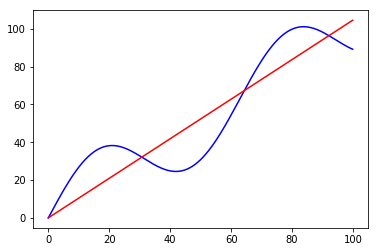

In [9]:
epochs = 200
init = tf.global_variables_initializer()  # Create an operation initializes all the variables.
sess = tf.Session() # start a session
sess.run(init)

#  Perform training.
for epoch in range(epochs):
    _,error,weight,b2 = sess.run([train, loss, W, b], feed_dict={X:X_data, y:y_data})
    if epoch % 20 == 0:
        print('epoch', epoch, 'weight:', weight, 'b:', b2, 'loss:', error)

y_pred = sess.run(y_hat, feed_dict={X:X_data, y:y_data}) # get predictions
plt.plot(X_data, y_data, 'b') # plot original data
plt.plot(X_data, y_pred, 'r') # plot learnt line
plt.show()

sess.close() # close session to release resources and free memory

## TensorBoard
TensorFlow provides a utility to visualize the computation graph.

In [10]:
writer = tf.summary.FileWriter('.')
writer.add_graph(tf.get_default_graph())

Now, in a new terminal, launch TensorBoard with the following shell command: <br>
`tensorboard --logdir .` <br>
OR <br>
`python -m tensorflow.tensorboard --logdir .` <br>
Then go to __[HERE](http://localhost:6006)__